## Notebook de demonstração para o módulo aproximação

In [11]:
#Bloco de configuração para importar o módulo de um diretório pai
import sys
import os
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [12]:
from CB2325NumericaG07.aproximacao import ajuste_polinomial
from CB2325NumericaG07.aproximacao import ajuste_linear
from CB2325NumericaG07.aproximacao import ajuste_exponencial

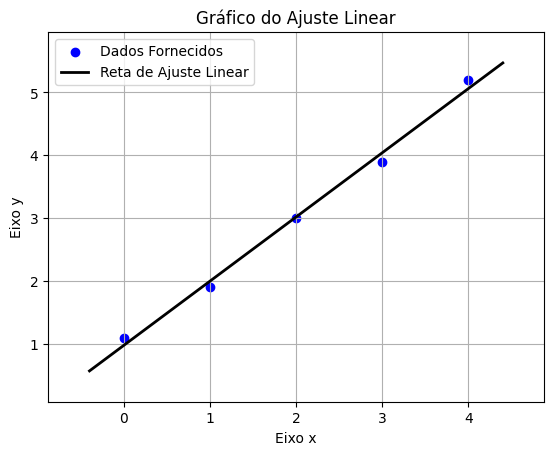

(1.02, 0.9800000000000004)

In [16]:
ajuste_linear([0, 1, 2, 3, 4], [1.1, 1.9, 3.0, 3.9, 5.2])

Função Polinomial Aproximadora 0.0035714285714284*x**2 + 0.733571428571429*x + 2.15


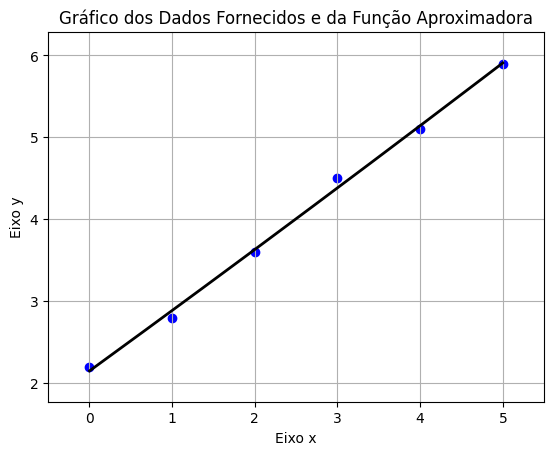

In [11]:
ajuste_polinomial([0, 1, 2, 3, 4, 5], [2.2, 2.8, 3.6, 4.5, 5.1, 5.9], 2)

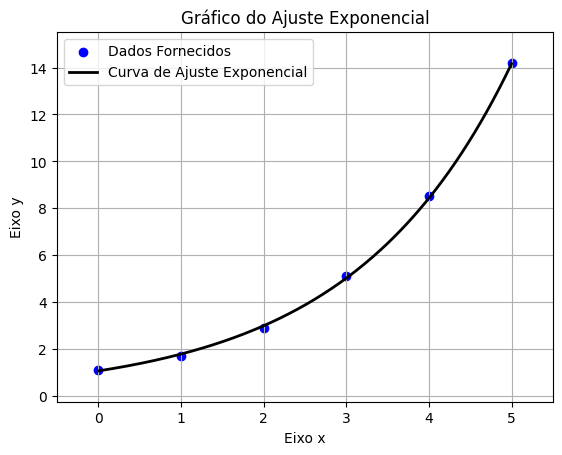

(0.5195000704015601, 1.0549036790467392)

In [13]:
ajuste_exponencial([0, 1, 2, 3, 4, 5], [1.1, 1.7, 2.9, 5.1, 8.5, 14.2])